In [2]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [3]:
df = pd.read_csv('MF_imputed.csv') 
#index_col = 0 drops that Unnamed: 0 column

In [4]:
df.head()

,y,Age,SibSp,ParCh,Fare,Duplicate_Cabin,Cab_Letter_B,Cab_Letter_C,Cab_Letter_D,Cab_Letter_E,...,Cab_Letter_G,Cab_Letter_None,Cab_Letter_T,Family_Size,Fare_Per_Person,Sex_male,Embarked__Q,Embarked__S,Class_2,Class_3
0,0.0,22.0,1.0,0.0,7.2,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,3.6,1.0,0.0,1.0,0.0,1.0
1,1.0,38.0,1.0,0.0,71.3,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,35.6,0.0,0.0,0.0,0.0,0.0
2,1.0,26.0,0.0,0.0,7.9,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,7.9,0.0,0.0,1.0,0.0,1.0
3,1.0,35.0,1.0,0.0,53.1,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,26.6,0.0,0.0,1.0,0.0,0.0
4,0.0,35.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,8.0,1.0,0.0,1.0,0.0,1.0


C:\Users\euana\AppData\Local\Temp\ipykernel_33760\1453810050.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  sns.heatmap(df[{'y', 'Cab_Letter_None'}].corr(),


<AxesSubplot:>

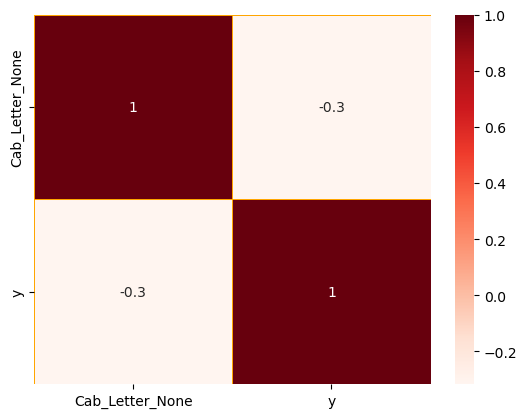

In [5]:
sns.heatmap(df[{'y', 'Cab_Letter_None'}].corr(),
           annot = True,
           linewidth = 0.65,
           linecolor='orange',
           cmap='Reds',
           fmt='.1g')

# Logistic Regression

In [6]:
df.columns

Index(['y', 'Age', 'SibSp', 'ParCh', 'Fare', 'Duplicate_Cabin', 'Cab_Letter_B',
       'Cab_Letter_C', 'Cab_Letter_D', 'Cab_Letter_E', 'Cab_Letter_F',
       'Cab_Letter_G', 'Cab_Letter_None', 'Cab_Letter_T', 'Family_Size',
       'Fare_Per_Person', 'Sex_male', 'Embarked__Q', 'Embarked__S', 'Class_2',
       'Class_3'],
      dtype='object')

In [7]:
# df = df[['y', 
#          'Age', 
#          #'SibSp', 'ParCh', 'Fare', 'Duplicate_Cabin', 'Cab_Letter_B',
#        #'Cab_Letter_C', 'Cab_Letter_D', 'Cab_Letter_E', 'Cab_Letter_F',
#        #'Cab_Letter_G', 'Cab_Letter_None', 'Cab_Letter_T', 'Family_Size',
#        #'Fare_Per_Person', 
#          'Sex_male', 
#          #'Embarked__Q', 
#          'Embarked__S', 
#          #'Class_2',
#        'Class_3']].copy()

In [8]:
y = df.y.copy()
x = df.drop('y', axis = 1)
x = sm.add_constant(x)

In [9]:
x.head()

,const,Age,SibSp,ParCh,Fare,Duplicate_Cabin,Cab_Letter_B,Cab_Letter_C,Cab_Letter_D,Cab_Letter_E,...,Cab_Letter_G,Cab_Letter_None,Cab_Letter_T,Family_Size,Fare_Per_Person,Sex_male,Embarked__Q,Embarked__S,Class_2,Class_3
0,1.0,22.0,1.0,0.0,7.2,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,3.6,1.0,0.0,1.0,0.0,1.0
1,1.0,38.0,1.0,0.0,71.3,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,35.6,0.0,0.0,0.0,0.0,0.0
2,1.0,26.0,0.0,0.0,7.9,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,7.9,0.0,0.0,1.0,0.0,1.0
3,1.0,35.0,1.0,0.0,53.1,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,26.6,0.0,0.0,1.0,0.0,0.0
4,1.0,35.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,8.0,1.0,0.0,1.0,0.0,1.0


In [54]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.2,
                                                    random_state = 1502)

In [55]:
y_train

385    0.0
364    0.0
506    1.0
767    0.0
161    1.0
      ... 
757    0.0
444    1.0
49     0.0
114    0.0
466    0.0
Name: y, Length: 712, dtype: float64

In [56]:
model = sm.Logit(y_train, x_train).fit()

         Current function value: 0.420817
         Iterations: 35


C:\Users\euana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [57]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  712
Model:                          Logit   Df Residuals:                      692
Method:                           MLE   Df Model:                           19
Date:                Tue, 27 Jun 2023   Pseudo R-squ.:                  0.3679
Time:                        06:45:09   Log-Likelihood:                -299.62
converged:                      False   LL-Null:                       -473.99
Covariance Type:            nonrobust   LLR p-value:                 1.863e-62
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               4.3539      0.903      4.821      0.000       2.584       6.124
Age                -0.0493      0.009     -5.201      0.000      -0.068      -0.031
SibSp              -0.2740        nan        nan        nan         nan         nan
ParCh               0.1179        nan        nan        nan         nan         nan
Fare               -0.0020      0.006     -0.357      0.721      -0.013       0.009
Duplicate_Cabin     0.9168      0.522      1.758      0.079      -0.105       1.939
Cab_Letter_B        0.4638      0.937      0.495      0.621      -1.373       2.300
Cab_Letter_C       -0.2465      0.872     -0.283      0.778      -1.956       1.463
Cab_Letter_D        0.4669      0.926      0.504      0.614      -1.348       2.281
Cab_Letter_E        0.9581      0.955      1.003      0.316      -0.914       2.830
Cab_Letter_F        0.3377      1.349      0.250      0.802      -2.306       2.981
Cab_Letter_G       -0.7996      1.619     -0.494      0.621      -3.972       2.373
Cab_Letter_None    -0.1520      0.841     -0.181      0.857      -1.800       1.496
Cab_Letter_T      -16.9076   8469.682     -0.002      0.998   -1.66e+04    1.66e+04
Family_Size        -0.1561        nan        nan        nan         nan         nan
Fare_Per_Person     0.0034      0.008      0.407      0.684      -0.013       0.020
Sex_male           -2.6910      0.232    -11.592      0.000      -3.146      -2.236
Embarked__Q        -0.4644      0.449     -1.034      0.301      -1.345       0.416
Embarked__S        -0.6759      0.282     -2.400      0.016      -1.228      -0.124
Class_2            -0.6391      0.513     -1.245      0.213      -1.645       0.367
Class_3            -1.7737      0.529     -3.355      0.001      -2.810      -0.737
===================================================================================
"""

Interpretation of model

In [58]:
res = model.summary().tables[1]
res_html = res.as_html()
res_df = pd.read_html(res_html, header = 0, index_col = 0)[0]
res_df

,coef,std err,z,P>|z|,[0.025,0.975]
const,4.3539,0.903,4.821,0.000,2.584,6.124
Age,-0.0493,0.009,-5.201,0.000,-0.068,-0.031
SibSp,-0.2740,NaN,NaN,NaN,NaN,NaN
ParCh,0.1179,NaN,NaN,NaN,NaN,NaN
Fare,-0.0020,0.006,-0.357,0.721,-0.013,0.009
Duplicate_Cabin,0.9168,0.522,1.758,0.079,-0.105,1.939
Cab_Letter_B,0.4638,0.937,0.495,0.621,-1.373,2.300
Cab_Letter_C,-0.2465,0.872,-0.283,0.778,-1.956,1.463
Cab_Letter_D,0.4669,0.926,0.504,0.614,-1.348,2.281
Cab_Letter_E,0.9581,0.955,1.003,0.316,-0.914,2.830


In [59]:
coef_df = res_df.loc[res_df['P>|z|'] < 0.05, ['coef']]
coef_df['Probability'] = round((np.exp(coef_df['coef']) - 1) * 100, 2)
coef_df

,coef,Probability
const,4.3539,7678.12
Age,-0.0493,-4.81
Sex_male,-2.6910,-93.22
Embarked__S,-0.6759,-49.13
Class_3,-1.7737,-83.03


# Assessing the model

In [60]:
predictions = model.predict(x_test)
predictions = np.where(predictions > 0.5, 1, 0)
predictionsb

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0])

Is the dataset balanced?

In [61]:
y_test.mean()

0.3854748603351955

# Confusion matrix 

In [62]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)
#TN,FP, FN, TP

array([[99, 11],
       [21, 48]], dtype=int64)

In [63]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

In [64]:
tn, tp, fp, fn

(99, 48, 11, 21)

## Accuracy

In [65]:
acc = round(((tp + tn) / (tp + tn + fp + fn)) * 100 , 2)

f1 = round((2 * tp / (2 * tp + fp + fn)) * 100, 2)

specifity = round((tn / (tn + fp))*100, 2)

sensitivity = round((tp / (tp + fn))*100, 2)

In [66]:
print(f"Accuracy is {acc}%\nF1-score is {f1}%\nSpecificity is {specifity}%\nSensitivity is {sensitivity}%")

Accuracy is 82.12%
F1-score is 75.0%
Specificity is 90.0%
Sensitivity is 69.57%


# Classification report

In [67]:
from sklearn.metrics import classification_report

In [30]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.82      0.90      0.86       110
         1.0       0.81      0.70      0.75        69

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179



# Creating submission CSV

## Training data

In [135]:
train = df.copy()

In [136]:
train_y = train.y

In [137]:
train.columns

Index(['y', 'Age', 'SibSp', 'ParCh', 'Fare', 'Duplicate_Cabin', 'Cab_Letter_B',
       'Cab_Letter_C', 'Cab_Letter_D', 'Cab_Letter_E', 'Cab_Letter_F',
       'Cab_Letter_G', 'Cab_Letter_None', 'Cab_Letter_T', 'Family_Size',
       'Fare_Per_Person', 'Sex_male', 'Embarked__Q', 'Embarked__S', 'Class_2',
       'Class_3'],
      dtype='object')

In [138]:
predictors_cols = ['Age', 'SibSp', 'ParCh', 'Fare', 'Duplicate_Cabin', 'Cab_Letter_B',
       'Cab_Letter_C', 'Cab_Letter_D', 'Cab_Letter_E', 'Cab_Letter_F',
       'Cab_Letter_G', 'Cab_Letter_None', 'Family_Size',
       'Fare_Per_Person', 'Sex_male', 'Embarked__Q', 'Embarked__S', 'Class_2',
       'Class_3'] #dropped Cab_Letter_T, only one instance and none in test data

In [139]:
train_X = train[predictors_cols]

In [140]:
my_model = sm.Logit(train_y, train_X).fit()

Optimization terminated successfully.
         Current function value: 0.442753
         Iterations 7


## Test data

In [147]:
test = pd.read_csv('test.csv')

In [148]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [149]:
Duplicate_Cabin = None

In [150]:
test.loc[test['Cabin'].isna(), 'Duplicate_Cabin'] = 'n'
test.loc[~test['Cabin'].isna() & ~test['Cabin'].duplicated(keep=False), 'Duplicate_Cabin'] = 'n'
test.loc[~test['Cabin'].isna() & test['Cabin'].duplicated(keep=False), 'Duplicate_Cabin'] = 'y'

In [151]:
test['Duplicate_Cabin'] = pd.get_dummies(test['Duplicate_Cabin'], drop_first=True, prefix ='Yes_')

In [152]:
test.Duplicate_Cabin.value_counts()

0    389
1     29
Name: Duplicate_Cabin, dtype: int64

In [153]:
hodl = []

In [154]:
for x in test.Cabin:
    if type(x) != float:
        hodl.append(x[0])
    else:
        hodl.append('None')

In [155]:
test['Cabin_Letter'] = hodl

In [156]:
test = pd.get_dummies(test, columns=['Cabin_Letter'], drop_first=True, prefix='Cab_Letter').copy()

In [157]:
test = test.drop(labels='Cabin', axis=1).copy()

In [158]:
test['Family_Size'] = test['SibSp']+test['Parch']

In [159]:
test['Fare_Per_Person']=test['Fare']/(test['Family_Size']+1)

In [160]:
test = pd.get_dummies(test, columns=['Sex'], drop_first=True).copy()

In [161]:
test = pd.get_dummies(test, columns=['Embarked'], prefix='Embarked_', drop_first=True).copy()

In [162]:
test = pd.get_dummies(test, columns=['Pclass'], prefix='Class', drop_first=True).copy()

In [163]:
test = test.drop(labels='Name', axis=1)

In [165]:
train_X.columns, test.columns

(Index(['Age', 'SibSp', 'ParCh', 'Fare', 'Duplicate_Cabin', 'Cab_Letter_B',
        'Cab_Letter_C', 'Cab_Letter_D', 'Cab_Letter_E', 'Cab_Letter_F',
        'Cab_Letter_G', 'Cab_Letter_None', 'Family_Size', 'Fare_Per_Person',
        'Sex_male', 'Embarked__Q', 'Embarked__S', 'Class_2', 'Class_3'],
       dtype='object'),
 Index(['PassengerId', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
        'Duplicate_Cabin', 'Cab_Letter_B', 'Cab_Letter_C', 'Cab_Letter_D',
        'Cab_Letter_E', 'Cab_Letter_F', 'Cab_Letter_G', 'Cab_Letter_None',
        'Family_Size', 'Fare_Per_Person', 'Sex_male', 'Embarked__Q',
        'Embarked__S', 'Class_2', 'Class_3'],
       dtype='object'))

In [166]:
test.to_csv('test_for_imputation.csv', index=False)

In [177]:
test = pd.read_csv('test_MF_imputed.csv')

In [178]:
test.columns

Index(['PassengerId', 'Age', 'SibSp', 'Parch', 'Fare', 'Duplicate_Cabin',
       'Cab_Letter_B', 'Cab_Letter_C', 'Cab_Letter_D', 'Cab_Letter_E',
       'Cab_Letter_F', 'Cab_Letter_G', 'Cab_Letter_None', 'Family_Size',
       'Fare_Per_Person', 'Sex_male', 'Embarked__Q', 'Embarked__S', 'Class_2',
       'Class_3'],
      dtype='object')

In [169]:
test.head()

,Age,SibSp,Parch,Fare,Duplicate_Cabin,Cab_Letter_B,Cab_Letter_C,Cab_Letter_D,Cab_Letter_E,Cab_Letter_F,Cab_Letter_G,Cab_Letter_None,Family_Size,Fare_Per_Person,Sex_male,Embarked__Q,Embarked__S,Class_2,Class_3
0,34.5,0.0,0.0,7.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,7.8,1.0,1.0,0.0,0.0,1.0
1,47.0,1.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3.5,0.0,0.0,1.0,0.0,1.0
2,62.0,0.0,0.0,9.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.7,1.0,1.0,0.0,1.0,0.0
3,27.0,0.0,0.0,8.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8.7,1.0,0.0,1.0,0.0,1.0
4,22.0,1.0,1.0,12.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,4.1,0.0,0.0,1.0,0.0,1.0


In [181]:
test_X = test[[#'PassengerId', 
    'Age', 'SibSp', 'Parch', 'Fare', 'Duplicate_Cabin', 'Cab_Letter_B',
       'Cab_Letter_C', 'Cab_Letter_D', 'Cab_Letter_E', 'Cab_Letter_F',
       'Cab_Letter_G', 'Cab_Letter_None', 'Family_Size', 'Fare_Per_Person',
       'Sex_male', 'Embarked__Q', 'Embarked__S', 'Class_2', 'Class_3']]

In [182]:
predicted = my_model.predict(test_X)
predicted = (round(predicted, 0))

In [183]:
print(predicted)

0      0.0
1      0.0
2      0.0
3      0.0
4      1.0
      ... 
413    0.0
414    1.0
415    0.0
416    0.0
417    0.0
Length: 418, dtype: float64


In [184]:
type(predicted)

pandas.core.series.Series

In [185]:
test['Survived'] = predicted

In [186]:
test.head()

,PassengerId,Age,SibSp,Parch,Fare,Duplicate_Cabin,Cab_Letter_B,Cab_Letter_C,Cab_Letter_D,Cab_Letter_E,...,Cab_Letter_G,Cab_Letter_None,Family_Size,Fare_Per_Person,Sex_male,Embarked__Q,Embarked__S,Class_2,Class_3,Survived
0,892.0,34.5,0.0,0.0,7.8,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,7.8,1.0,1.0,0.0,0.0,1.0,0.0
1,893.0,47.0,1.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,3.5,0.0,0.0,1.0,0.0,1.0,0.0
2,894.0,62.0,0.0,0.0,9.7,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,9.7,1.0,1.0,0.0,1.0,0.0,0.0
3,895.0,27.0,0.0,0.0,8.7,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,8.7,1.0,0.0,1.0,0.0,1.0,0.0
4,896.0,22.0,1.0,1.0,12.3,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,2.0,4.1,0.0,0.0,1.0,0.0,1.0,1.0


In [187]:
test = test[['PassengerId', 
                    #'Age', 'SibSp', 
                    #'ParCh', 'Fare', 
                    #'Class_2', 'Class_3',
                   #'Sex_male', 
                    'Survived']].copy()

In [192]:
test.dtypes

PassengerId    float64
Survived         int64
dtype: object

In [193]:
test = test.astype({'Survived': 'int64', 'PassengerId': 'int32'})

In [194]:
test.dtypes

PassengerId    int32
Survived       int64
dtype: object

In [195]:
test

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [196]:
test.to_csv('sixthsubmission.csv', index=False)

# Model using KNN imputed values

In [ ]:
df_knn = pd.read_csv('KNN_imputed.csv')

## KNN model

In [ ]:
y = df_knn.y.copy()
x = df_knn.drop('y', axis = 1)
x = sm.add_constant(x)
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.2,
                                                    random_state = 1502)
knn_model = sm.Logit(y_train, x_train).fit()
x.shape

## Assess KNN model

In [ ]:
def assess_model(m):
    res = m.summary().tables[1]
    res_html = res.as_html()
    res_df = pd.read_html(res_html, header = 0, index_col = 0)[0]
    coef_df = res_df.loc[res_df['P>|z|'] < 0.05, ['coef']]
    coef_df['Probability'] = round((np.exp(coef_df['coef']) - 1) * 100, 2)
    coef_df
    balance = y_test.mean()
    predictions = model.predict(x_test)
    predictions = np.where(predictions > 0.5, 1, 0)
    tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
    acc = round(((tp + tn) / (tp + tn + fp + fn)) * 100 , 2)
    f1 = round((2 * tp / (2 * tp + fp + fn)) * 100, 2)
    specifity = round((tn / (tn + fp))*100, 2)
    sensitivity = round((tp / (tp + fn))*100, 2)
    print(model.summary().tables[0])
    print(coef_df)
    print(balance) 
    return print(f"Accuracy is {acc}%\nF1-score is {f1}%\nSpecificity is {specifity}%\nSensitivity is {sensitivity}%")

In [ ]:
assess_model(knn_model)

# Model using Miss Forest values

In [ ]:
df_mf = pd.read_csv('MF_imputed.csv')

## Miss Forest model

In [ ]:
y = df_mf.y.copy()
x = df_mf.drop('y', axis = 1)
x = sm.add_constant(x)
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.2,
                                                    random_state = 1502)
mf_model = sm.Logit(y_train, x_train).fit()

## Assess Miss Forest model

In [ ]:
assess_model(mf_model)

# Submissions with imputed values

In [ ]:
test_KNN = pd.read_csv('test_KNN_imputed.csv')
test_MF = pd.read_csv('test_MF_imputed.csv')

In [ ]:
test_KNN.head(0)

In [ ]:
test_KNN.dtypes

## KNN

In [ ]:
def myfunc_2(d):
    test_X = d[predictors_cols]
    test_X = sm.add_constant(test_X)
    predicted = mf_model.predict(test_X)
    predicted = (round(predicted, 0))
    d['Survived'] = predicted
    test = d[['PassengerId', 
                        #'Age', 'SibSp', 
                        #'ParCh', 'Fare', 
                        #'Class_2', 'Class_3',
                       #'Sex_male', 
                        'Survived']].copy()
    test = test.astype({'Survived': 'int64', 'PassengerId': 'int32'})
    test
    return test.to_csv('MF_trained_KNN_test_submission.csv', index=False)

In [ ]:
myfunc_2(test_KNN)

In [ ]:
temp = pd.read_csv('MF_trained_KNN_test_submission.csv')

In [ ]:
temp.shape

In [ ]:
temp.dtypes

## MF

In [ ]:
def myfunc_2(d):
    test_X = d[predictors_cols]
    test_X = sm.add_constant(test_X)
    predicted = knn_model.predict(test_X)
    predicted = (round(predicted, 0))
    d['Survived'] = predicted
    test = d[['PassengerId', 
                        #'Age', 'SibSp', 
                        #'ParCh', 'Fare', 
                        #'Class_2', 'Class_3',
                       #'Sex_male', 
                        'Survived']].copy()
    test = test.astype({'Survived': 'int64', 'PassengerId': 'int32'})
    test
    return test.to_csv('KNN_trained_MF_test_submission.csv', index=False)

In [ ]:
myfunc_2(test_MF)

In [ ]:
temp = pd.read_csv('KNN_trained_MF_test_submission.csv')

In [ ]:
temp.shape

In [ ]:
temp.dtypes